In [5]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [11]:
def readCSV(fn):
#This is a function to read file. You can input the path of the file and this function will output a np.array.
#Attention:this function can only be used to read 2D files.

#     fn: data file path
#     read the csv file 
#     return the data array
    
    f = open(fn)
    geology = []
    #i = 0
    
    for line in f:
        geology_line = []
        #parsed_line = str.split(line,",")
        parsed_line = line.split(",")
        #print("parsing line", i) # Th
        #i +=1 
        #j = 0
        for word in parsed_line:
            geology_line.append(float(word))
            #print("Parsing word ", j , "on line", i)
            #j = j +1
        geology.append(geology_line)
        #print("data ", data)

    #print(data)
    f.close()
    
    return np.array(geology)
    

In [12]:
#get three arraies for further study
geology = readCSV("best.geology")

mway = readCSV("best.mway")

pop = readCSV("best.pop")

Click the 'Save Map' buttonn will save to file  `weighted_map.csv`.

<IPython.core.display.Javascript object>


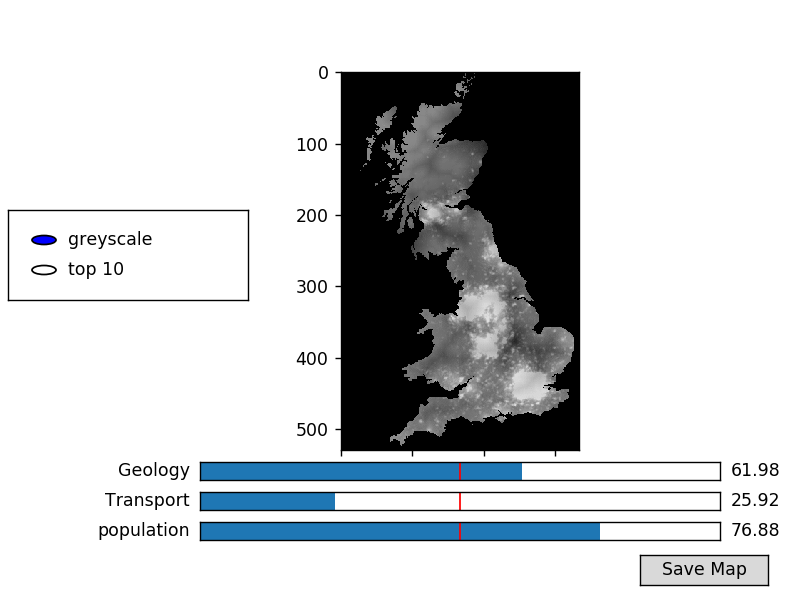

In [13]:
#show the map in Jupyter Notebook
%matplotlib notebook

# window axis
imgAxis = plt.subplot(111)
plt.subplots_adjust(left=0.25, bottom=0.25)

# the default merged map
fmap = (geology + mway + pop) / 3

# image window
imgWin = plt.imshow(fmap, cmap='gray', vmin=0, vmax=255)

# define the 3 slidebar
ax1  = plt.axes([0.25, 0.20, 0.65, 0.03])
sw1 = Slider(ax1, 'Geology', 0, 100.0, valinit=50)

ax2  = plt.axes([0.25, 0.15, 0.65, 0.03])
sw2 = Slider(ax2, 'Transport', 0, 100.0, valinit=50)

ax3 = plt.axes([0.25, 0.1, 0.65, 0.03])
sw3 = Slider(ax3, 'population', 0, 100.0, valinit=50)

# define the radio buttons to decide whether show the top 10 percent in blue
radioAxis = plt.axes([0.01, 0.5, 0.3, 0.15])
radioButton = RadioButtons(radioAxis, ('greyscale', 'top 10'), active=0)

# button to save map
saveAx = plt.axes([0.8, 0.025, 0.16, 0.05])
saveButton = Button(saveAx, 'Save Map', hovercolor='0.8')

# function to redraw the image
def redraw(val):
#     print("redraw")
    global fmap
    w1 = sw1.val
    w2 = sw2.val
    w3 = sw3.val
    
    # calculate the weighted map
    fmap = (geology * w1 + mway*w2  + pop*w3) / (w1 + w2 + w3)
    
    if radioButton.value_selected == 'greyscale':
        imgWin.set_data(fmap)
        imgWin.set_cmap('gray')
    else:
        # the top 10 percent value
        max10 = np.percentile(fmap, 90)
        colorImg = np.stack((fmap,)*3, axis=-1)
        
        for i in range(fmap.shape[0]):
            for j in range(fmap.shape[1]):
                # set top 10 to blue
                if fmap[i, j] >= max10:
                    colorImg[i, j, 0] = 0
                    colorImg[i, j, 1] = 0

        imgWin.set_data(colorImg)
        imgWin.set_cmap(None)
    
    plt.draw()
    
#     plt.show()
#     print("redraw")

# function to save weight map
def saveMap(event):
    print("save map")
    #fmap = (geology * w1 + mway*w2  + pop*w3) / (w1 + w2 + w3)
    with open("weighted_map.csv", "w") as f:
        for r in fmap:
            line = [str(int(x)) for x in r]
            f.write(','.join(line) + '\n')
            
    
    print("Save to weighted_map.csv")
#this file will be saved in the same path as this code

sw1.on_changed(redraw)
sw2.on_changed(redraw)
sw3.on_changed(redraw)

radioButton.on_clicked(redraw)

saveButton.on_clicked(saveMap)

plt.show()